### To create effective visualizations of data you will need to become familiar with Python's Matplotlib package. This lesson follows on from the _"Intro to Pandas and working with CSV files"_ and is modeled after [Section 1 of "Scientists Guide to Plotting Data in Python"](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/) written by Jenny Palomino and Leah Wasser, but here we will be working with our CO2 dataset.

#### You should be __entering__ this lesson with ...
* Knowledge of Pandas DataFrames and how to open and work with data in a CSV file.
* Having read completely through
[__this lesson__](https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/ "click here!").

#### You should be __leaving__ this lesson with ...
* The ability to explain the matplotlib object-oriented approach to plotting.
* The ability to create different types of plots using matplotlib.
* The ability to customize plots (including labels and colors) using matplotlib.
* The ability to create figures with multiple plots.

In [1]:
import pandas as pd                          
import matplotlib.pyplot as plt              

%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6   

### Load our data into a Pandas DataFrame

In [3]:
df_CO2 = pd.read_csv('/home/pachamama/shared/model_output/obs/Greenhouse_Gases/CO2/MaunaLoa_CO2.csv')

In [4]:
df_CO2

,Year,Month,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty
0,1958,3,315.70,NaN
1,1958,4,317.45,NaN
2,1958,5,317.51,NaN
3,1958,6,317.24,NaN
4,1958,7,315.86,NaN
...,...,...,...,...
776,2022,11,417.51,NaN
777,2022,12,418.95,NaN
778,2023,1,419.47,NaN
779,2023,2,420.41,NaN


### Recall that we have to convert our Pandas DataFrame into a datetime object so that we can properly plot the time series. We create a column called "Date" in our DataFrame and set it equal to the Calendar_Date variable we just created and inspect our DataFrame.

In [9]:
Calendar_Date = pd.to_datetime(df_CO2[['Year','Month']].assign(day=1))
df_CO2['Date'] = Calendar_Date

In [10]:
df_CO2

,Year,Month,Mauna Loa CO2 (ppm),Mauna Loa CO2 uncertainty,Date
0,1958,3,315.70,NaN,1958-03-01
1,1958,4,317.45,NaN,1958-04-01
2,1958,5,317.51,NaN,1958-05-01
3,1958,6,317.24,NaN,1958-06-01
4,1958,7,315.86,NaN,1958-07-01
...,...,...,...,...,...
776,2022,11,417.51,NaN,2022-11-01
777,2022,12,418.95,NaN,2022-12-01
778,2023,1,419.47,NaN,2023-01-01
779,2023,2,420.41,NaN,2023-02-01


### Now we are ready for plotting!

Matplotlib uses an "object oriented approach" to plotting. This means that plots can be built step-by-step by adding new elements to the plot -- each "figure" and "axis" is considered a seperate "object". You can have as many axis objects within your figure object as you want!

* __figure object__: the overall figure space (your entire blank canvas!) that can contain one or more plots.

* __axis objects__: the individual plots that are rendered within the figure.

![image](https://www.earthdatascience.org/images/earth-analytics/plot-data/fig-1-plot.png)

<center> source: https://www.earthdatascience.org/images/earth-analytics/plot-data/fig-1-plot.png </center>

#### We will be using __Pyplot__ module to add different components to figure objects, including creating the individual plots as axis objects, also known as subplots. We imported the pyplot module earlier and assigned the alias __plt__ in our import packages cell.

To create a plot using matplotlib’s object oriented approach, you first create the figure (which we assign the variable name "__fig__") and at least one axis (which we assign the variable name "__ax__") using the subplots() function from the pyplot module:

Notice that the fig and ax are created at the same time by setting them equal to the output of the pyplot.subplots() function. As no other arguments have been provided, the result is a figure with one plot (your axis object) that is empty but ready for data.

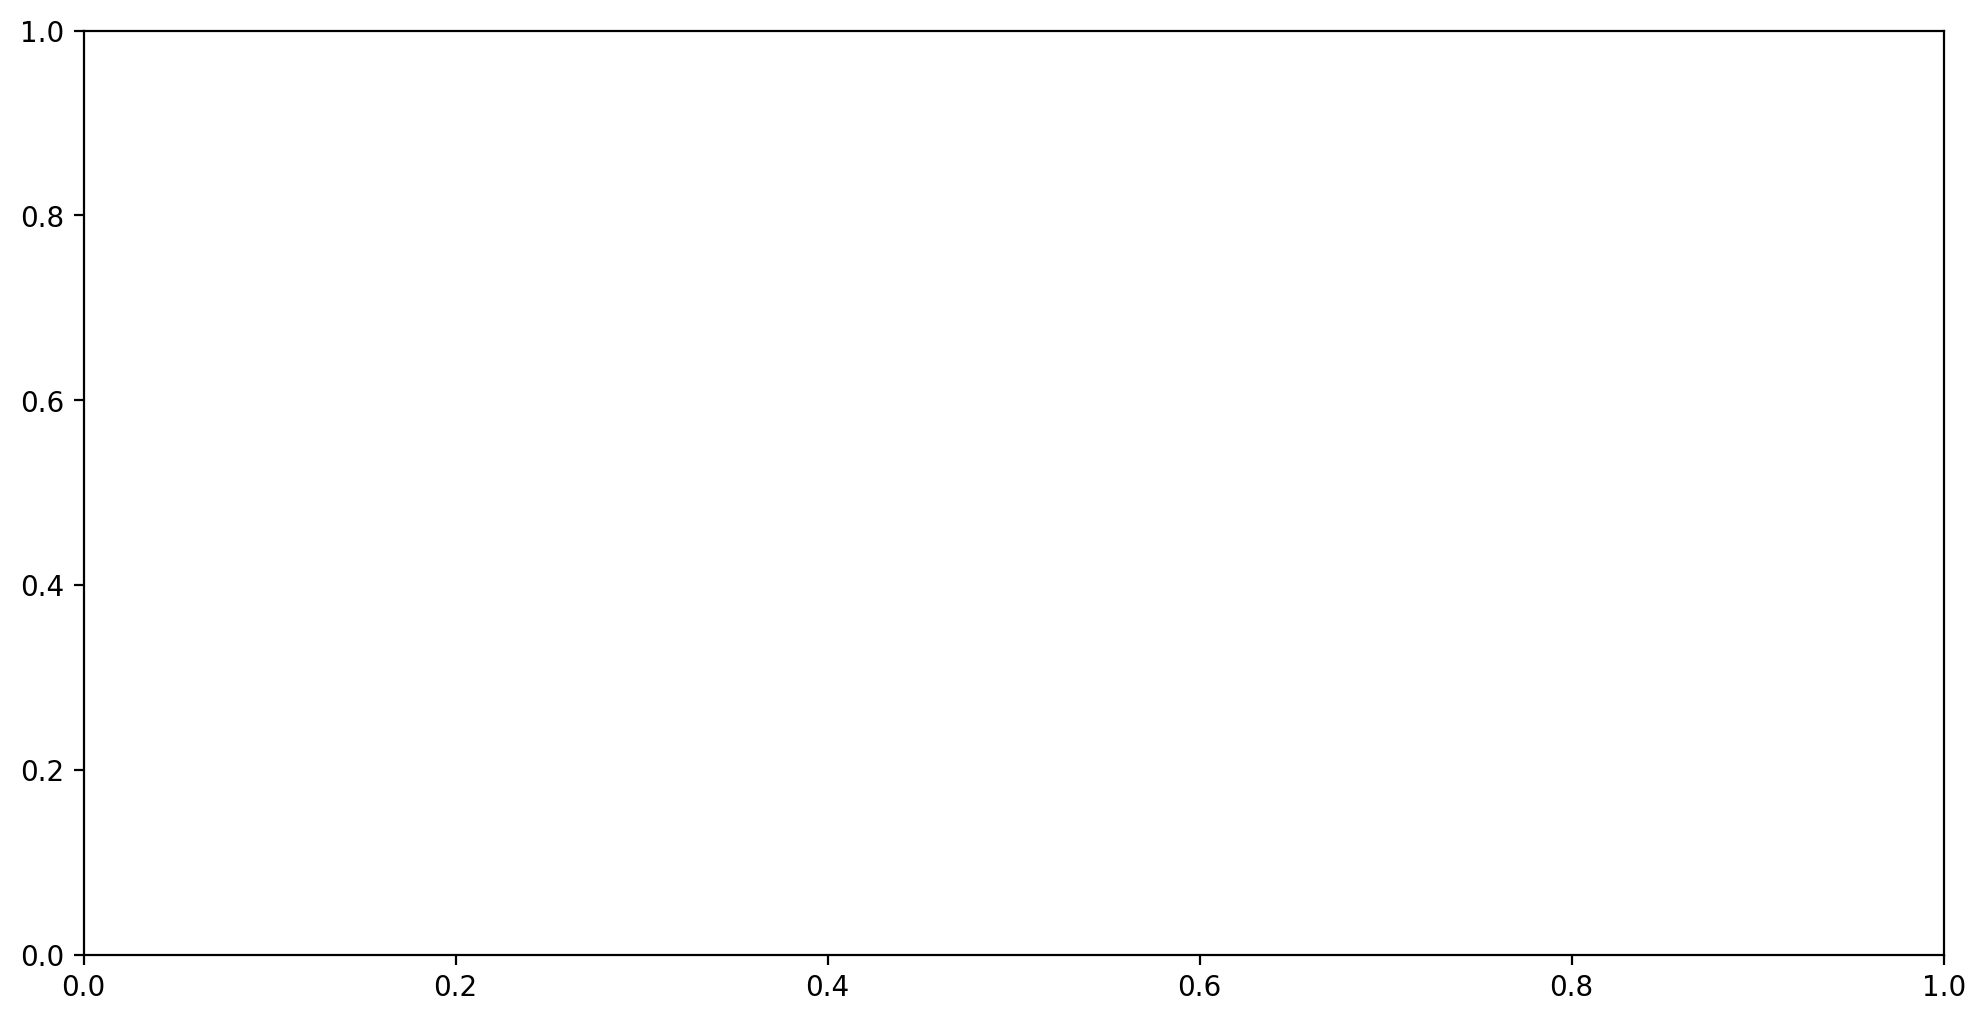

In [20]:
fig, ax = plt.subplots() 
## fig and ax are just variable names for the figure and axis objects,
## we really can call them anything we want (f, a, etc .. but fig, ax keeps it intuitive)
## It is considered good practice to call the figure fig and axes ax, ax1, ax2 (etc).

#### What if we wanted to change our figure size?

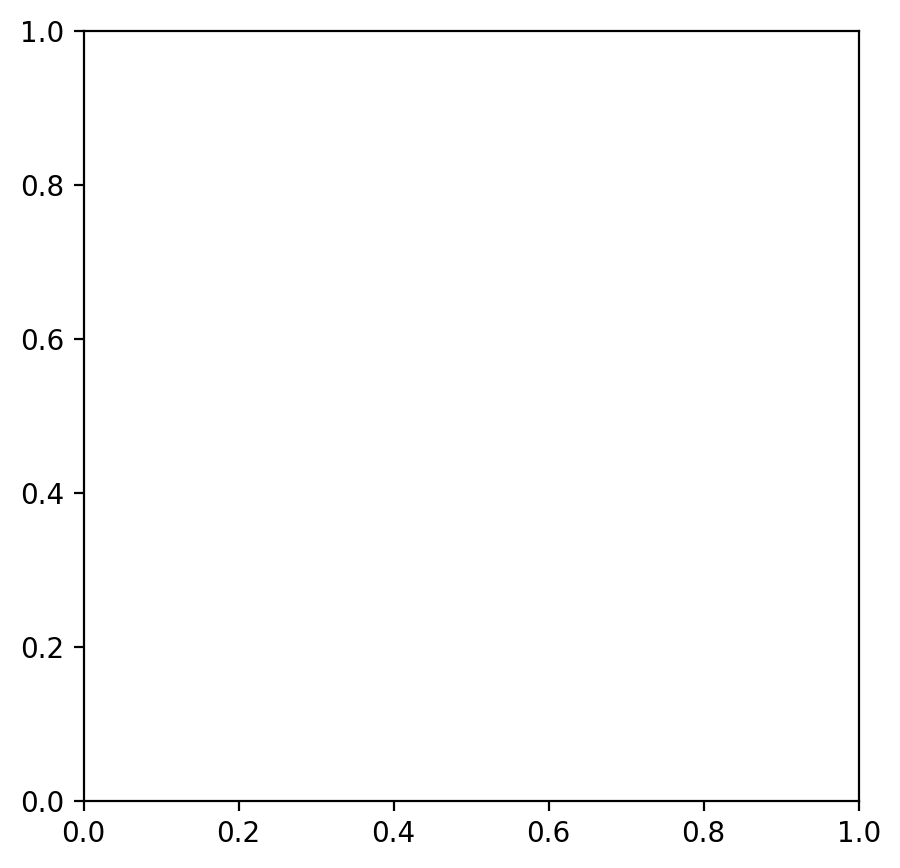

In [16]:
## figsize = (width, height)
fig, ax = plt.subplots(figsize = (5, 5))

### Lets add our data to our plot.

Here we are calling the .plot method of the ax object and specifying the arguments for the x axis and the y axis of the plot as follows: __ax.plot(x_axis, y_axis)__. In our case we want our x_axis to be the calendar date and our y_axis to be atmospheric CO2 concentration, so we must specify the appropriate columns within our pandas DataFrame.

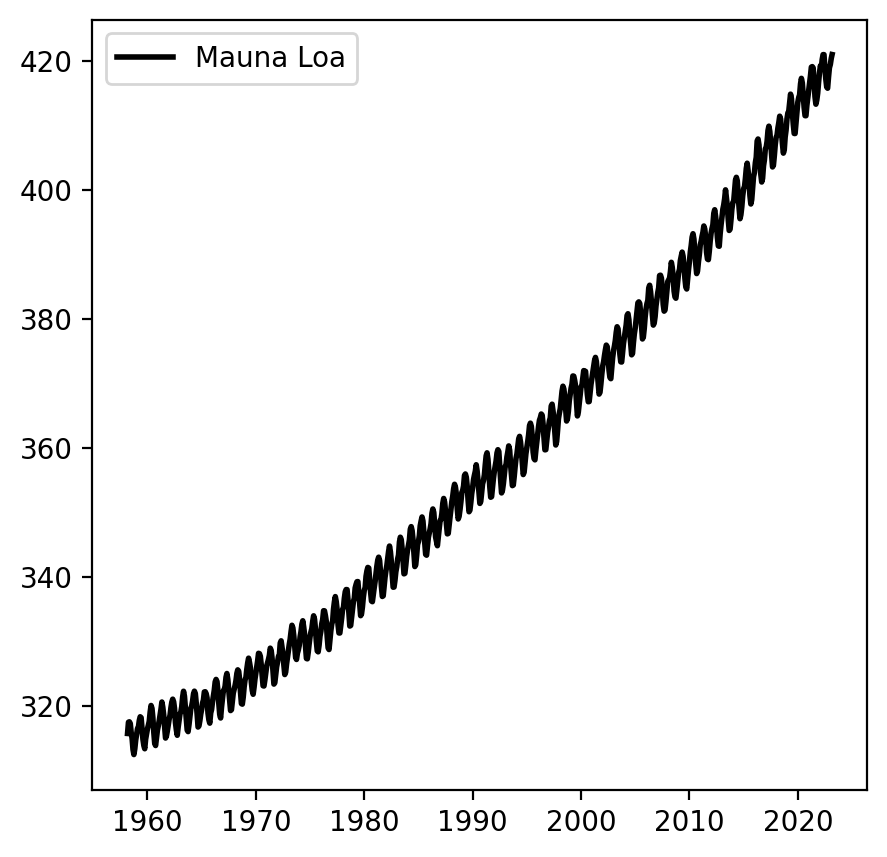

In [34]:
## Here we have added additional arguments of linewidth, label, and color to specify
## the line thickness, lable for the legend, and the color of the line. There are more 
## customizations you can make, but more on this later.

fig, ax = plt.subplots(figsize = (5, 5))

ax.plot(df_CO2['Date'],
        df_CO2['Mauna Loa CO2 (ppm)'],
        linewidth=2,label='Mauna Loa',
        color='black')

## plot a legend on the ax
ax.legend() 

### By default, ax.plot() creates a line plot. What if we wanted to make a scatter or bar plot instead?
* __Scatter plots__ (using ax.scatter): values are displayed as individual points that are not connected with a continuous line.
* __Bar plots__ (using ax.bar): values are displayed as bars with height indicating the value at a specific point.

### Scatter Plot

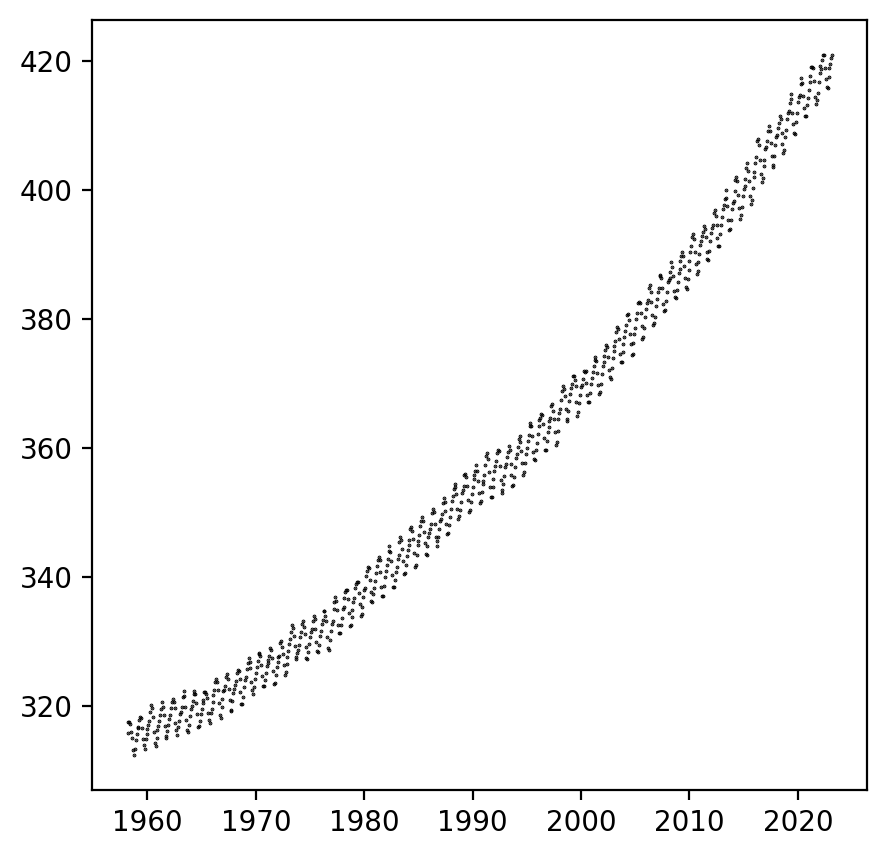

In [36]:
## Here we have added additional arguments of label, marker, s, and color to specify
## the lable for the legend, marker style with '.' indicating a dot, marker size,
## and marker color. There are more customizations you can make, but more on this later.

fig, ax = plt.subplots(figsize = (5, 5))

ax.scatter(df_CO2['Date'],
        df_CO2['Mauna Loa CO2 (ppm)'],
        label='Mauna Loa',
        marker='.',s=0.5, color='black')

### Bar Plot

<BarContainer object of 781 artists>

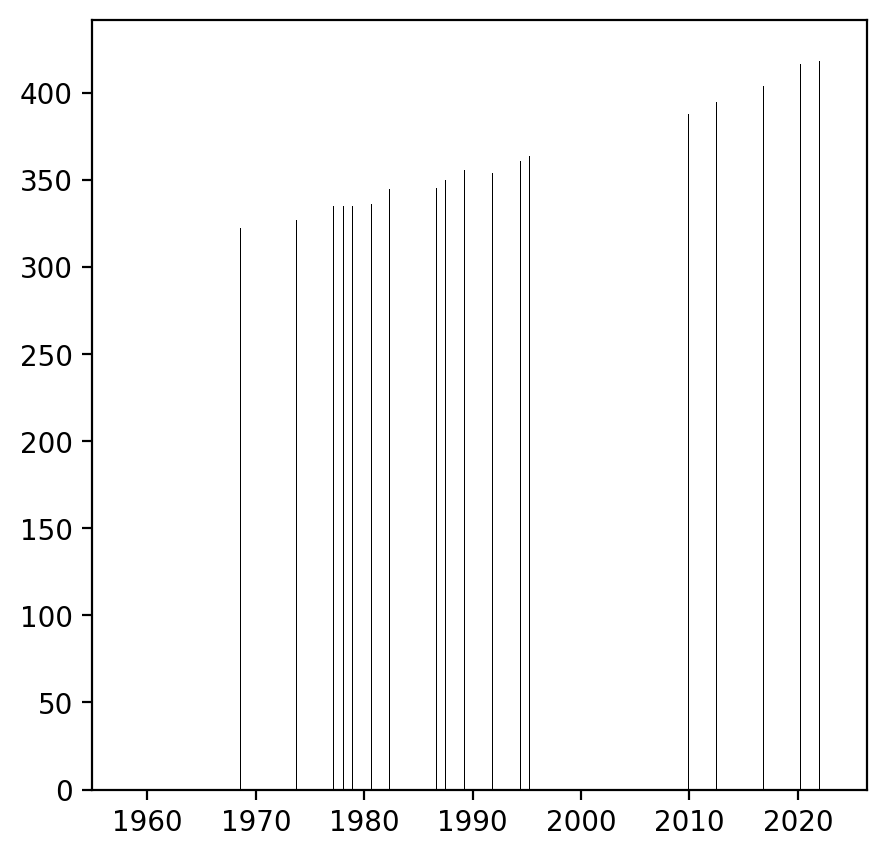

In [42]:
### This looks wonky because we have so much data! It does not make sense
### to show a bar plot for all of the data. See below where we just show a 
### few months for an example.

fig, ax = plt.subplots(figsize = (5, 5))

ax.bar(df_CO2['Date'],
        df_CO2['Mauna Loa CO2 (ppm)'],
        label='Mauna Loa',
        color='black')

<BarContainer object of 2 artists>

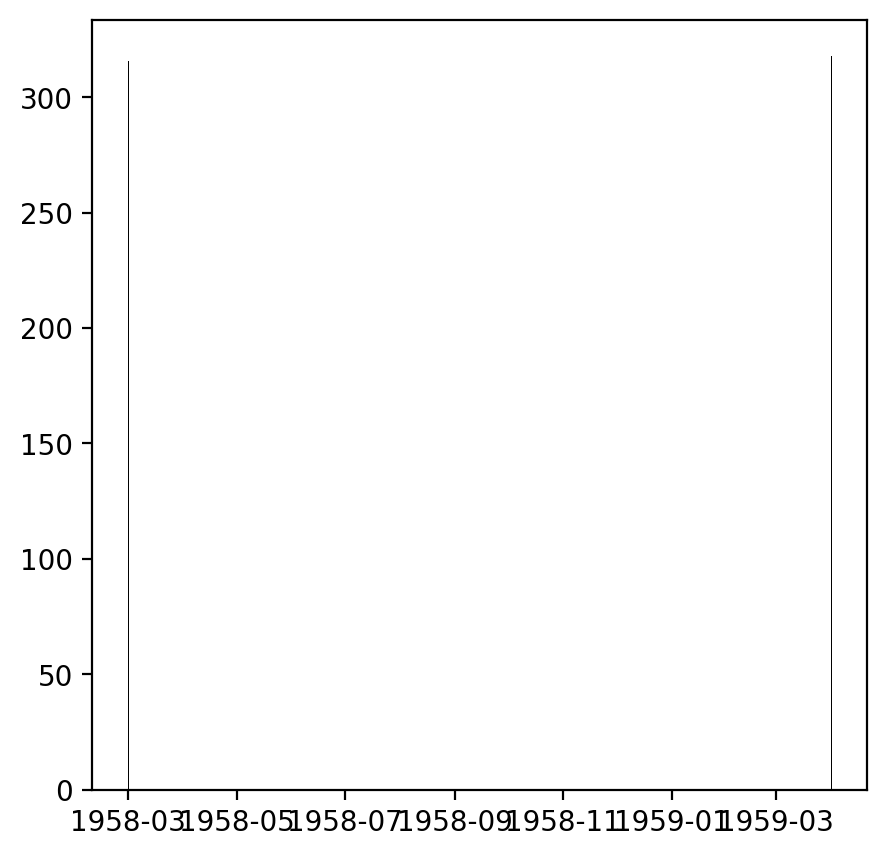

In [48]:
fig, ax = plt.subplots(figsize = (5, 5))

ax.bar(df_CO2['Date'][[0,13]],
        df_CO2['Mauna Loa CO2 (ppm)'][[0,13]],
        label='Mauna Loa',
        color='black')

### What if we had multiple datasets that we wanted show on seperate plots?

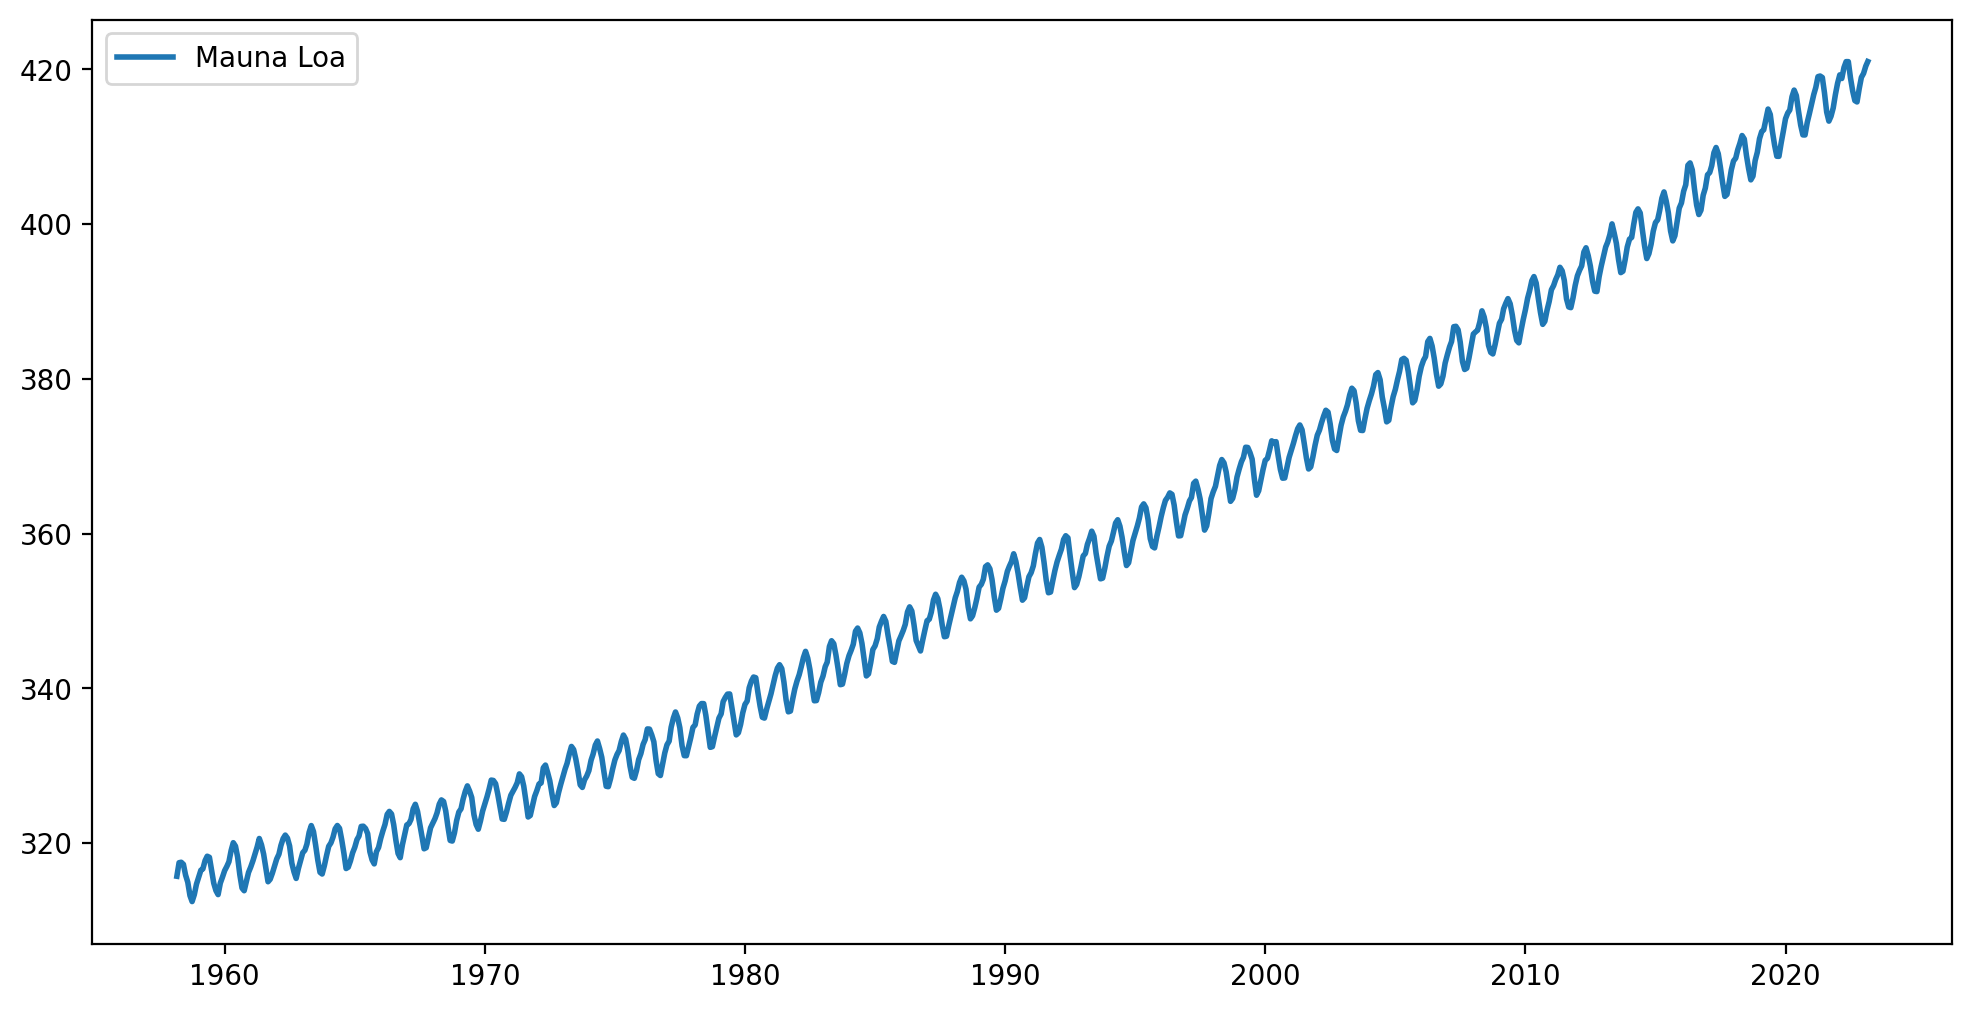

In [6]:
plt.plot(df_CO2['Date'],
         df_CO2['Mauna Loa CO2 (ppm)'],
         linewidth=2, label = 'Mauna Loa')
plt.legend()